# Building Data Genome Project 2.0
## Meters data quality visualization

Biam! (pic.biam@gmail.com)

In [1]:
# data and numbers
import numpy as np
import pandas as pd
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
%matplotlib inline

import gc

In [2]:
path = "..//data//meters//raw//"

# Introduction

Outliers in the raw meters dataset were detected using the [Seasonal Hybrid ESD (S-H-ESD)](https://github.com/twitter/AnomalyDetection) developed by Twitter. This was implemented in R language, the process can be found [here](link to R notebook).<br>
The methodology used here is from _Forensically discovering simulation feedback knowledge from a campus energy information system_ [(Miller - Schlueter, 2015)](https://cargocollective.com/buildingdata/Forensic-Analysis-of-Campus-Dataset)<br>
The values for each hour will be changed into the following ordinal values:
* NaN -- 0
* 0 Values -- 1
* Outliers -- 2
* "Good Data" -- 3

# Functions

In [3]:
def plotHeatmap(df, metername):
    numberofplots = 1
    fig = plt.figure(figsize=(10,15))
    #plt.rc('ytick', labelsize=yfont)

    # Get the data
    x = mdates.drange(df.columns[0], df.columns[-1] + dt.timedelta(hours=1), dt.timedelta(hours=1))
    #y = df.index
    y = np.linspace(1, len(df), len(df))

    # Plot
    ax = fig.add_subplot(numberofplots, 1, 1)

    data = np.array(df)

    cmap = plt.get_cmap('Reds', 4)

    qmesh = ax.pcolormesh(x, y, data, cmap=cmap, rasterized=True)

    cbaxes = fig.add_axes([0.13, 0.1, 0.77, 0.02]) 
    cbar = fig.colorbar(qmesh, ax=ax, orientation='horizontal', cax = cbaxes)
    cbar.ax.tick_params(length = 0)
    tick_locator = ticker.MaxNLocator(nbins=3)
    cbar.locator = tick_locator
    cbar.update_ticks()
    cbar.set_label('Quality Metric')

    ax.axis('tight')

    # Set up as dates
    ax.xaxis_date()
    #ax.yaxis.set_ticks()
    fig.autofmt_xdate()
    fig.subplots_adjust(hspace=.5)

    ax.set_xlabel("Timeline", fontsize=16)
    ax.set_ylabel("Building", fontsize=16)
    ax.set_title(str(metername) +" Meter Quality Screening", fontdict={'fontsize':20},
)
    #plt.tight_layout()
    plt.subplots_adjust(bottom=0.17)
    
    return fig

# Chilledwater meter

In [4]:
# load data
df = pd.read_csv(path + "chilledwater.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 556 entries, timestamp to Elinor_Cockatoo_Healthcare
dtypes: float64(555), object(1)
memory usage: 74.4+ MB


In [5]:
# Transform timestamp to datetime object type
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')

## Detect NaNs and atypical data

In [6]:
# load anomalies df
df_anom = pd.read_csv("anomalies\\chilledwater_anoms.csv")
# Transform timestamp to datetime object type
df_anom["timestamp"] = pd.to_datetime(df_anom["timestamp"], format='%Y-%m-%d %H:%M:%S')
# Remove timezone offset at the end of timestamp
df_anom["timestamp"] = df_anom.timestamp.apply(lambda d: d.replace(tzinfo=None))

In [7]:
df_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 384 entries, timestamp to Diedre_Cockatoo_Publicservices
dtypes: datetime64[ns](1), float64(383)
memory usage: 51.4 MB


To plot a building with outliers marked:

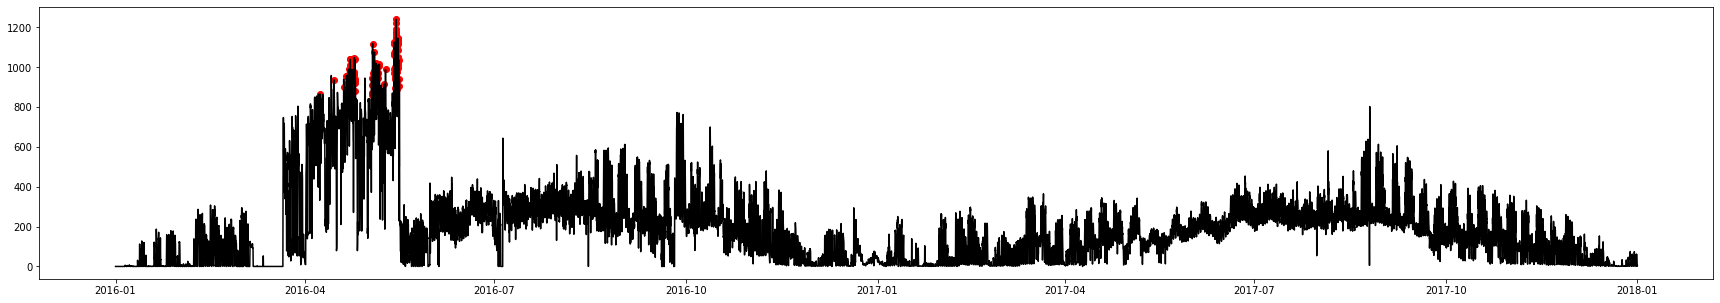

In [9]:
plt.figure(figsize=(30,5))
plt.scatter(df_anom["timestamp"], df_anom["Pearl_Fox_Office"], c='red', marker='o', linestyle='None')
plt.plot(df["timestamp"], df["Pearl_Fox_Office"], c= "black")
plt.show()

In [10]:
# Outliers
df_anom = df_anom.set_index("timestamp")
outliers = df_anom.copy()

In [11]:
# replace not null values with 2 (outliers)
outliers[outliers.isna() == False] = 2

In [12]:
# Set index and copy to replace values
df_qm = df.set_index("timestamp").copy()

In [13]:
# "Good data"
df_qm[df_qm > 0] = 3
# Zero values
df_qm[df_qm <= 0] = 1
# Update df with outliers data
df_qm.update(outliers)
# Fill na with 0
df_qm.fillna(value=0, inplace=True)

In [14]:
# Sort by quantity of "good data"
df_qm = df_qm.T.loc[df_qm.T.sum(axis=1).sort_values().index]

## Plot

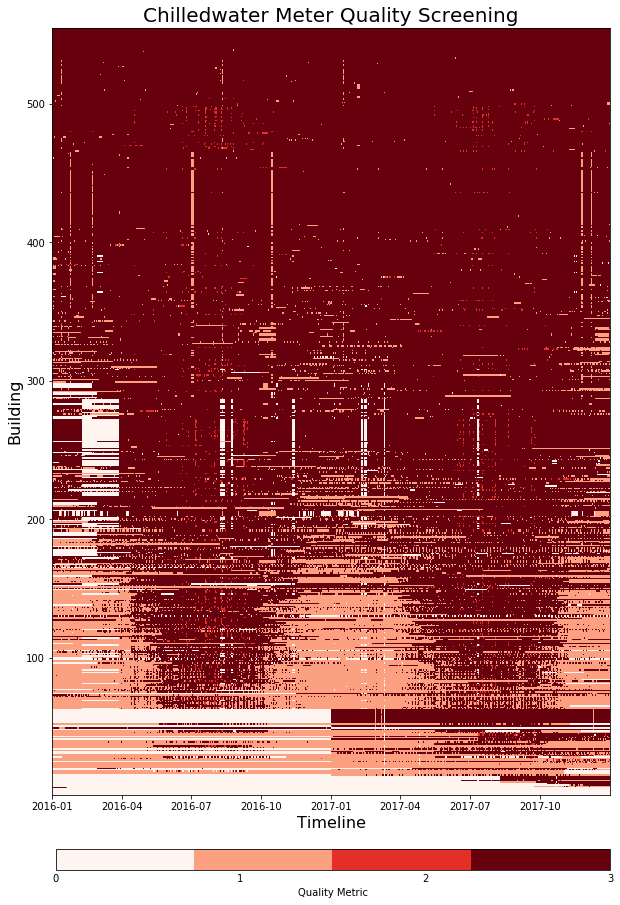

In [15]:
fig = plotHeatmap(df_qm, "Chilledwater")

In [16]:
pd.DataFrame(df_qm.index, index = np.linspace(1, len(df_qm), len(df_qm)), columns = ["building_id"])

,building_id
1.0,Deloris_Cockatoo_Education
2.0,Randolph_Cockatoo_Education
3.0,Magaret_Cockatoo_Lodging/residential
4.0,Karyn_Bobcat_Entertainment/publicassembly
5.0,Ricardo_Eagle_Office
...,...
551.0,Monte_Fox_Entertainment/publicassembly
552.0,Chester_Hog_Publicservices
553.0,Eddy_Fox_Education
554.0,Kendrick_Fox_Education


In [17]:
fig.savefig("..\\figures\\dataQuality_chilledwater.jpg", dpi=300, bbox_inches='tight')

# Electricity meter

In [18]:
# load data
df = pd.read_csv(path + "electricity.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 1579 entries, timestamp to Bernardo_Mouse_Technology/science
dtypes: float64(1578), object(1)
memory usage: 211.3+ MB


In [19]:
# Transform timestamp to datetime object type
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')

## Detect NaNs and atypical data

In [20]:
# load anomalies df
df_anom = pd.read_csv("anomalies\\electricity_anoms.csv")
# Transform timestamp to datetime object type
df_anom["timestamp"] = pd.to_datetime(df_anom["timestamp"], format='%Y-%m-%d %H:%M:%S')
# Remove timezone offset at the end of timestamp
df_anom["timestamp"] = df_anom.timestamp.apply(lambda d: d.replace(tzinfo=None))

In [21]:
df_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 1065 entries, timestamp to Bernardo_Mouse_Technology/science
dtypes: datetime64[ns](1), float64(1064)
memory usage: 142.6 MB


To plot a building with outliers marked:

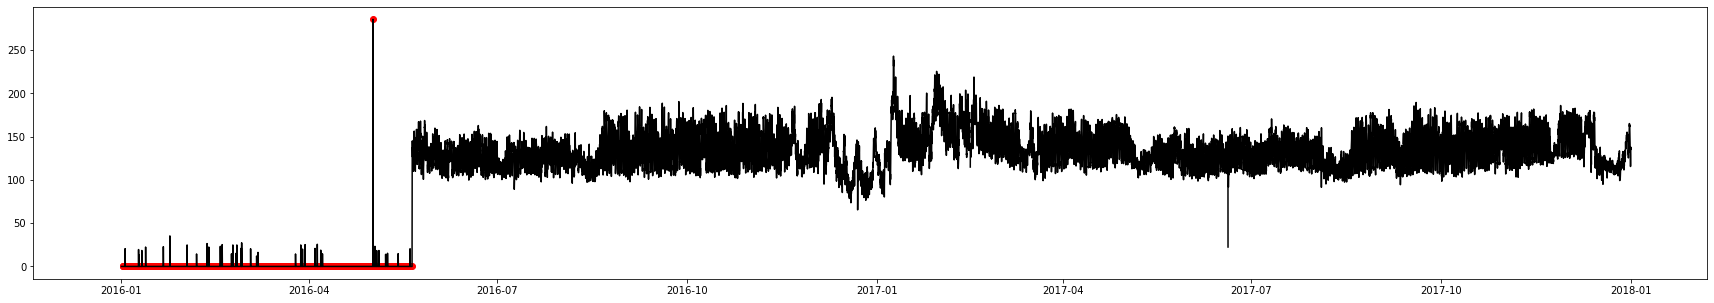

In [22]:
plt.figure(figsize=(30,5))
plt.scatter(df_anom["timestamp"], df_anom["Jarrod_Panther_Lodging/residential"], c='red', marker='o', linestyle='None')
plt.plot(df["timestamp"], df["Jarrod_Panther_Lodging/residential"], c= "black")
plt.show()

In [23]:
# Outliers
df_anom = df_anom.set_index("timestamp")
outliers = df_anom.copy()

In [24]:
# replace not null values with 2 (outliers)
outliers[outliers.isna() == False] = 2

In [25]:
# Set index and copy to replace values
df_qm = df.set_index("timestamp").copy()

In [26]:
# "Good data"
df_qm[df_qm > 0] = 3
# Zero values
df_qm[df_qm <= 0] = 1
# Update df with outliers data
df_qm.update(outliers)
# Fill na with 0
df_qm.fillna(value=0, inplace=True)

In [27]:
# Sort by quantity of "good data"
df_qm = df_qm.T.loc[df_qm.T.sum(axis=1).sort_values().index]

## Plot

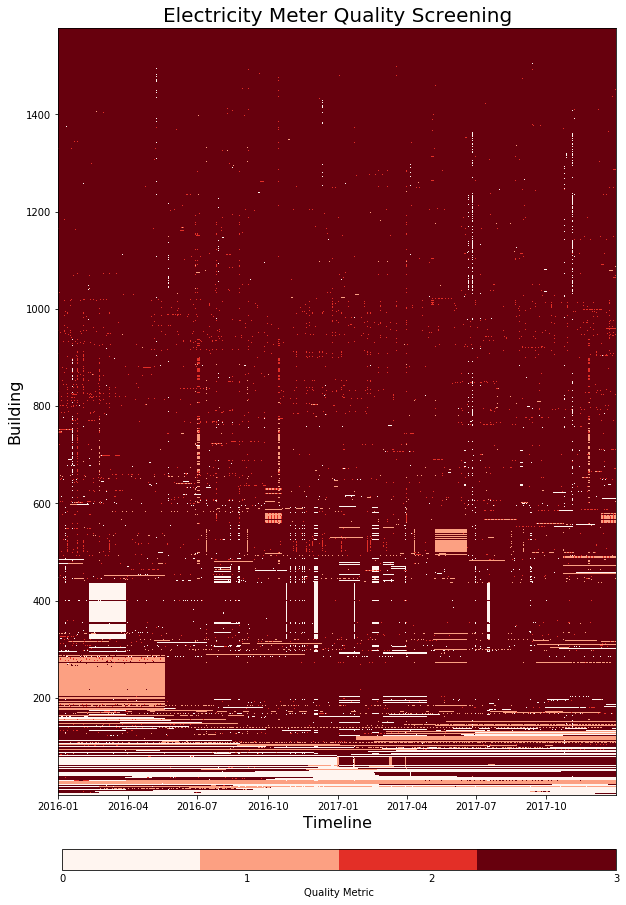

In [28]:
fig = plotHeatmap(df_qm, "Electricity")

In [29]:
pd.DataFrame(df_qm.index, index = np.linspace(1, len(df_qm), len(df_qm)), columns = ["building_id"])

,building_id
1.0,Morgan_Peacock_Lodging/residential
2.0,Kelley_Rat_Publicservices
3.0,Whitney_Bobcat_Education
4.0,Fernanda_Bobcat_Education
5.0,Kandice_Rat_Education
...,...
1574.0,Lydia_Hog_Office
1575.0,Marcie_Hog_Education
1576.0,Janie_Robin_Publicservices
1577.0,Dorothy_Lamb_Entertainment/publicassembly


In [30]:
fig.savefig("..\\figures\\dataQuality_electricity.jpg", dpi=300, bbox_inches='tight')

# Gas meter

In [121]:
# load data
df = pd.read_csv(path + "gas.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 178 entries, timestamp to Mary_Wolve_Education
dtypes: float64(177), object(1)
memory usage: 23.8+ MB


In [122]:
# Transform timestamp to datetime object type
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')

## Detect NaNs and atypical data

In [123]:
# load anomalies df
df_anom = pd.read_csv("anomalies\\gas_anoms.csv")
# Transform timestamp to datetime object type
df_anom["timestamp"] = pd.to_datetime(df_anom["timestamp"], format='%Y-%m-%d %H:%M:%S')
# Remove timezone offset at the end of timestamp
df_anom["timestamp"] = df_anom.timestamp.apply(lambda d: d.replace(tzinfo=None))

In [124]:
df_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 158 entries, timestamp to Mary_Wolve_Education
dtypes: datetime64[ns](1), float64(157)
memory usage: 21.1 MB


To plot a building with outliers marked:

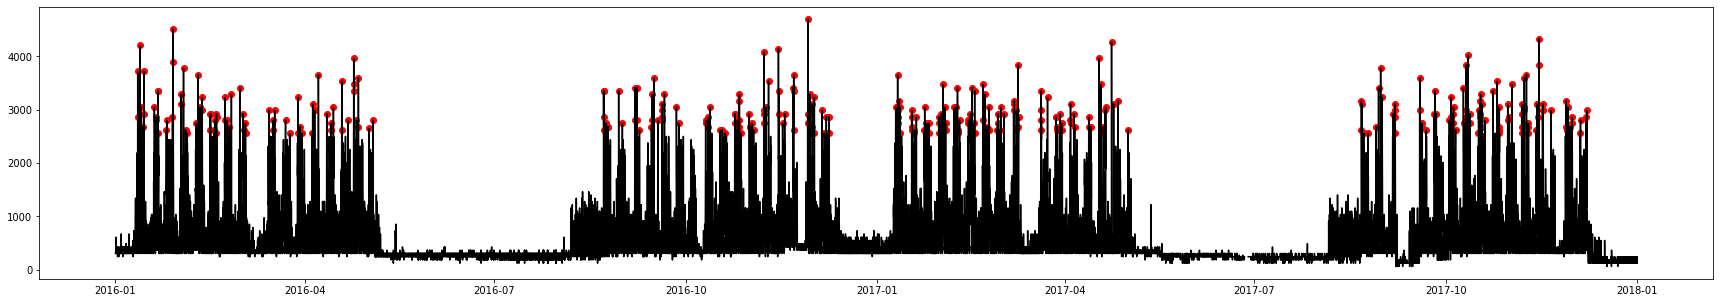

In [125]:
plt.figure(figsize=(30,5))
plt.scatter(df_anom["timestamp"], df_anom["Dean_Panther_Lodging/residential"], c='red', marker='o', linestyle='None')
plt.plot(df["timestamp"], df["Dean_Panther_Lodging/residential"], c= "black")
plt.show()

In [126]:
# Outliers
df_anom = df_anom.set_index("timestamp")
outliers = df_anom.copy()

In [127]:
# replace not null values with 2 (outliers)
outliers[outliers.isna() == False] = 2

In [128]:
# Set index and copy to replace values
df_qm = df.set_index("timestamp").copy()

In [129]:
# "Good data"
df_qm[df_qm > 0] = 3
# Zero values
df_qm[df_qm <= 0] = 1
# Update df with outliers data
df_qm.update(outliers)
# Fill na with 0
df_qm.fillna(value=0, inplace=True)

In [130]:
# Sort by quantity of "good data"
df_qm = df_qm.T.loc[df_qm.T.sum(axis=1).sort_values().index]

## Plot

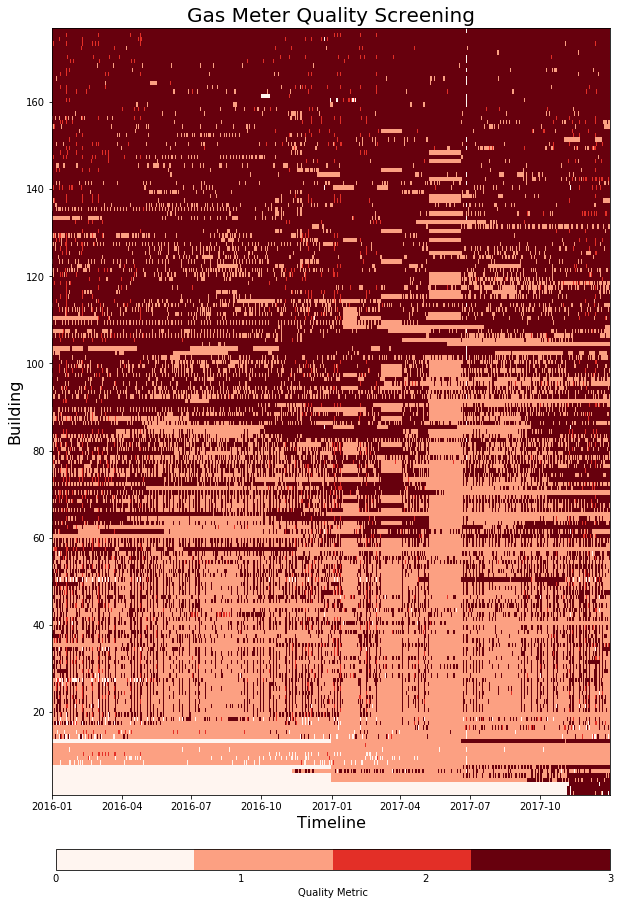

In [131]:
fig = plotHeatmap(df_qm, "Gas")

In [132]:
pd.DataFrame(df_qm.index, index = np.linspace(1, len(df_qm), len(df_qm)), columns = ["building_id"])

,building_id
1.0,Bryan_Bobcat_Lodging/residential
2.0,Amanda_Bobcat_Lodging/residential
3.0,Fernanda_Bobcat_Education
4.0,Marcus_Lamb_Entertainment/publicassembly
5.0,Lorraine_Lamb_Education
...,...
173.0,Lazaro_Lamb_Education
174.0,Tabitha_Bobcat_Education
175.0,Ike_Lamb_Education
176.0,Ivan_Panther_Lodging/residential


In [133]:
fig.savefig("..\\figures\\dataQuality_gas.jpg", dpi=300, bbox_inches='tight')

# Hotwater meter

In [44]:
# load data
df = pd.read_csv(path + "hotwater.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 186 entries, timestamp to Linnie_Cockatoo_Entertainment/publicassembly
dtypes: float64(185), object(1)
memory usage: 24.9+ MB


In [45]:
# Transform timestamp to datetime object type
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')

## Detect NaNs and atypical data

In [46]:
# load anomalies df
df_anom = pd.read_csv("anomalies\\hotwater_anoms.csv")
# Transform timestamp to datetime object type
df_anom["timestamp"] = pd.to_datetime(df_anom["timestamp"], format='%Y-%m-%d %H:%M:%S')
# Remove timezone offset at the end of timestamp
df_anom["timestamp"] = df_anom.timestamp.apply(lambda d: d.replace(tzinfo=None))

In [47]:
df_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 150 entries, timestamp to Linnie_Cockatoo_Entertainment/publicassembly
dtypes: datetime64[ns](1), float64(149)
memory usage: 20.1 MB


In [49]:
df_anom.columns

Index(['timestamp', 'Janie_Robin_Publicservices', 'Gayle_Robin_Office',
       'Dina_Robin_Office', 'Colleen_Robin_Office', 'Leslie_Robin_Education',
       'Shelby_Robin_Education', 'Dianna_Robin_Education',
       'Lashandra_Robin_Education', 'Karyl_Robin_Education',
       ...
       'Carmen_Peacock_Entertainment/publicassembly',
       'Victoria_Peacock_Office', 'Emory_Peacock_Office',
       'Rogelio_Peacock_Publicservices', 'Lesa_Peacock_Education',
       'Ilse_Peacock_Education', 'Melody_Peacock_Entertainment/publicassembly',
       'Armando_Peacock_Office', 'Angle_Cockatoo_Education',
       'Linnie_Cockatoo_Entertainment/publicassembly'],
      dtype='object', length=150)

To plot a building with outliers marked:

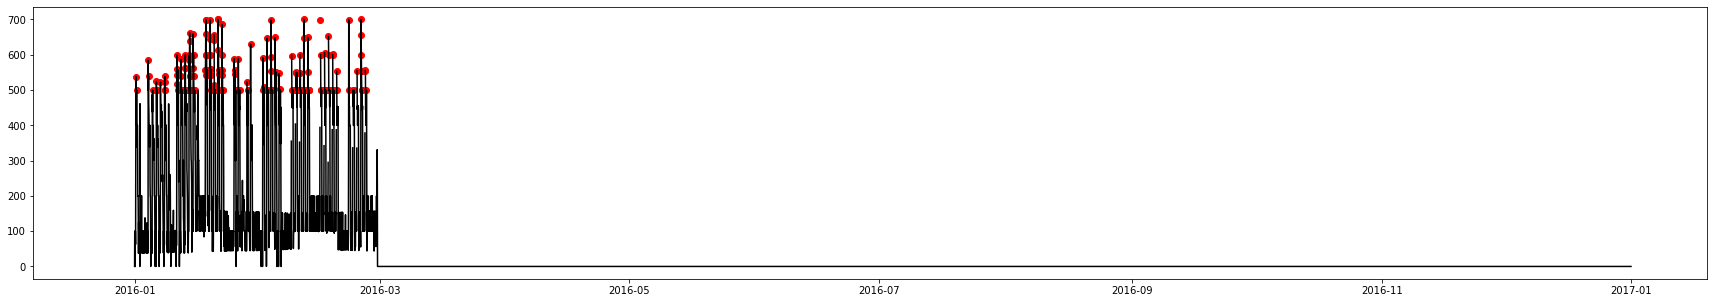

In [51]:
plt.figure(figsize=(30,5))
plt.scatter(df_anom["timestamp"], df_anom["Gayle_Robin_Office"], c='red', marker='o', linestyle='None')
plt.plot(df["timestamp"], df["Gayle_Robin_Office"], c= "black")
plt.show()

In [52]:
# Outliers
df_anom = df_anom.set_index("timestamp")
outliers = df_anom.copy()

In [53]:
# replace not null values with 2 (outliers)
outliers[outliers.isna() == False] = 2

In [54]:
# Set index and copy to replace values
df_qm = df.set_index("timestamp").copy()

In [55]:
# "Good data"
df_qm[df_qm > 0] = 3
# Zero values
df_qm[df_qm <= 0] = 1
# Update df with outliers data
df_qm.update(outliers)
# Fill na with 0
df_qm.fillna(value=0, inplace=True)

In [56]:
# Sort by quantity of "good data"
df_qm = df_qm.T.loc[df_qm.T.sum(axis=1).sort_values().index]

## Plot

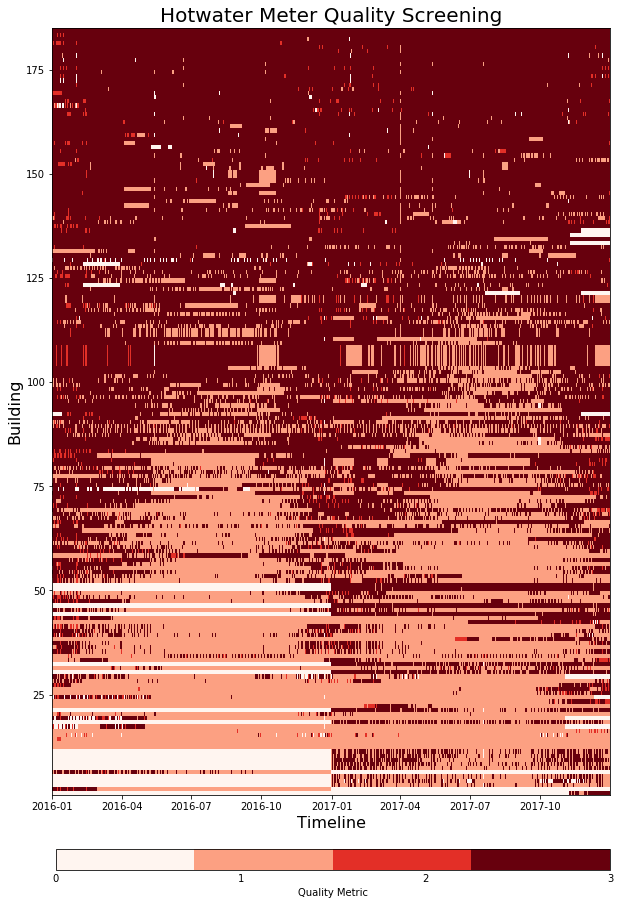

In [57]:
fig = plotHeatmap(df_qm, "Hotwater")

In [58]:
pd.DataFrame(df_qm.index, index = np.linspace(1, len(df_qm), len(df_qm)), columns = ["building_id"])

,building_id
1.0,Fernanda_Bobcat_Education
2.0,Gayle_Robin_Office
3.0,Shonda_Swan_Unknown
4.0,Darrel_Swan_Unknown
5.0,Sylvia_Swan_Unknown
...,...
181.0,Lynelle_Fox_Education
182.0,Vernon_Fox_Lodging/residential
183.0,Sheila_Fox_Education
184.0,Lauren_Fox_Education


In [59]:
fig.savefig("..\\figures\\dataQuality_hotwater.jpg", dpi=300, bbox_inches='tight')

# Irrigation meter

In [60]:
# load data
df = pd.read_csv(path + "irrigation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   timestamp                              17544 non-null  object 
 1   Georgie_Panther_Lodging/residential    15320 non-null  float64
 2   Dean_Panther_Lodging/residential       16472 non-null  float64
 3   Jarrod_Panther_Lodging/residential     7559 non-null   float64
 4   Fausto_Panther_Parking                 14823 non-null  float64
 5   Iva_Panther_Parking                    16924 non-null  float64
 6   Gale_Panther_Lodging/residential       11214 non-null  float64
 7   Mellissa_Panther_Lodging/residential   17477 non-null  float64
 8   Ricky_Panther_Lodging/residential      17488 non-null  float64
 9   Kaitlin_Panther_Parking                16593 non-null  float64
 10  Gino_Panther_Parking                   13957 non-null  float64
 11  Kr

In [61]:
# Transform timestamp to datetime object type
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')

## Detect NaNs and atypical data

In [62]:
# load anomalies df
df_anom = pd.read_csv("anomalies\\irrigation_anoms.csv")
# Transform timestamp to datetime object type
df_anom["timestamp"] = pd.to_datetime(df_anom["timestamp"], format='%Y-%m-%d %H:%M:%S')
# Remove timezone offset at the end of timestamp
df_anom["timestamp"] = df_anom.timestamp.apply(lambda d: d.replace(tzinfo=None))

In [63]:
df_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   timestamp                             17544 non-null  datetime64[ns]
 1   Georgie_Panther_Lodging/residential   306 non-null    float64       
 2   Dean_Panther_Lodging/residential      329 non-null    float64       
 3   Jarrod_Panther_Lodging/residential    151 non-null    float64       
 4   Fausto_Panther_Parking                296 non-null    float64       
 5   Iva_Panther_Parking                   89 non-null     float64       
 6   Gale_Panther_Lodging/residential      224 non-null    float64       
 7   Mellissa_Panther_Lodging/residential  349 non-null    float64       
 8   Ricky_Panther_Lodging/residential     349 non-null    float64       
 9   Kaitlin_Panther_Parking               331 non-null    float64       
 10

To plot a building with outliers marked:

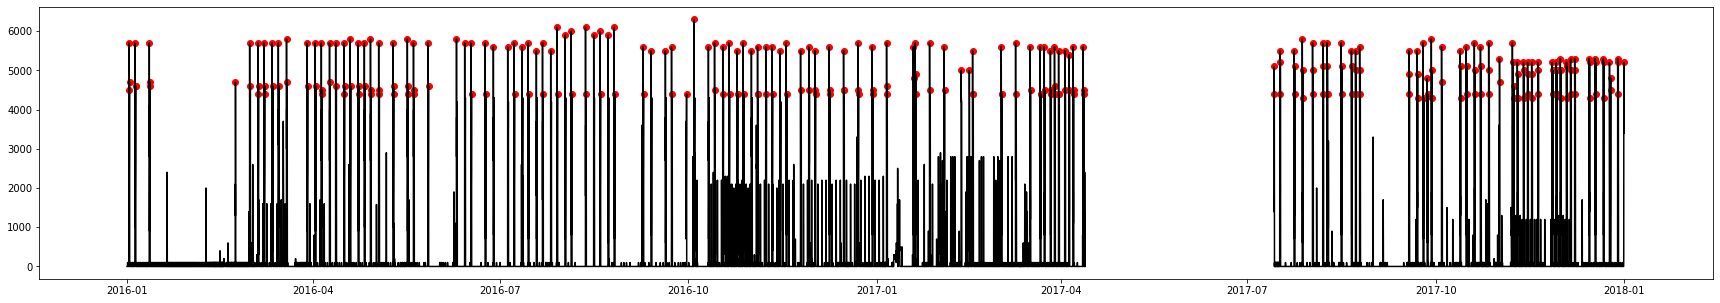

In [64]:
plt.figure(figsize=(30,5))
plt.scatter(df_anom["timestamp"], df_anom["Georgie_Panther_Lodging/residential"], c='red', marker='o', linestyle='None')
plt.plot(df["timestamp"], df["Georgie_Panther_Lodging/residential"], c= "black")
plt.show()

In [65]:
# Outliers
df_anom = df_anom.set_index("timestamp")
outliers = df_anom.copy()

In [66]:
# replace not null values with 2 (outliers)
outliers[outliers.isna() == False] = 2

In [67]:
# Set index and copy to replace values
df_qm = df.set_index("timestamp").copy()

In [68]:
# "Good data"
df_qm[df_qm > 0] = 3
# Zero values
df_qm[df_qm <= 0] = 1
# Update df with outliers data
df_qm.update(outliers)
# Fill na with 0
df_qm.fillna(value=0, inplace=True)

In [69]:
# Sort by quantity of "good data"
df_qm = df_qm.T.loc[df_qm.T.sum(axis=1).sort_values().index]

## Plot

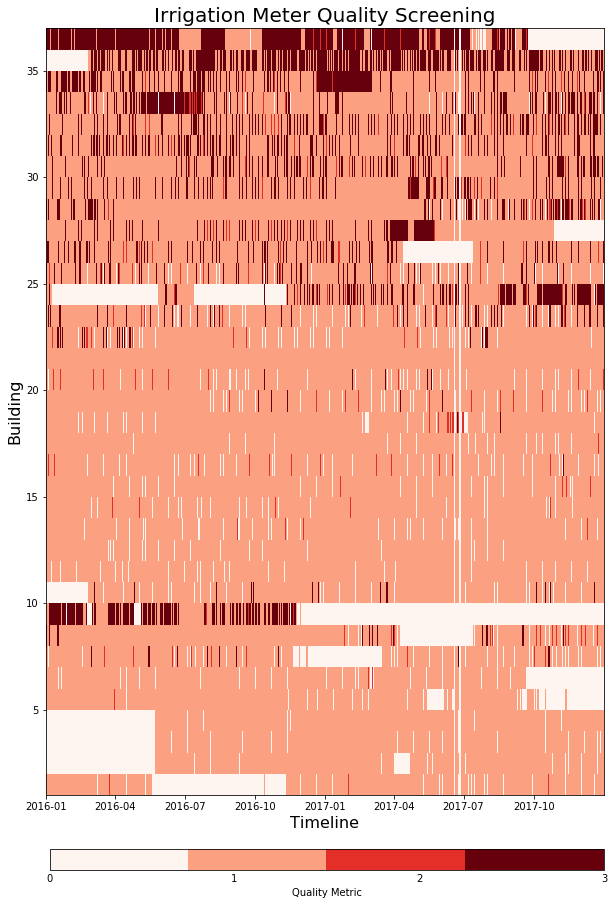

In [70]:
fig = plotHeatmap(df_qm, "Irrigation")

In [71]:
pd.DataFrame(df_qm.index, index = np.linspace(1, len(df_qm), len(df_qm)), columns = ["building_id"])

,building_id
1.0,Taryn_Panther_Office
2.0,Ina_Panther_Lodging/residential
3.0,Sophia_Panther_Lodging/residential
4.0,Catherine_Panther_Lodging/residential
5.0,Karri_Panther_Office
6.0,Romeo_Panther_Lodging/residential
7.0,Gino_Panther_Parking
8.0,Patience_Panther_Parking
9.0,Jarrod_Panther_Lodging/residential
10.0,Graham_Panther_Education


In [72]:
fig.savefig("..\\figures\\dataQuality_irrigation.jpg", dpi=300, bbox_inches='tight')

# Solar meter

In [134]:
# load data
df = pd.read_csv(path + "solar.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 17544 non-null  object 
 1   Mari_Bobcat_Education     17523 non-null  float64
 2   Tabitha_Bobcat_Education  17496 non-null  float64
 3   Kenny_Bobcat_Education    17521 non-null  float64
 4   Amelia_Bobcat_Other       17524 non-null  float64
 5   Yvette_Bobcat_Office      0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 822.5+ KB


In [135]:
# Transform timestamp to datetime object type
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')

## Detect NaNs and atypical data

In [136]:
# load anomalies df
df_anom = pd.read_csv("anomalies\\solar_anoms.csv")
# Transform timestamp to datetime object type
df_anom["timestamp"] = pd.to_datetime(df_anom["timestamp"], format='%Y-%m-%d %H:%M:%S')
# Remove timezone offset at the end of timestamp
df_anom["timestamp"] = df_anom.timestamp.apply(lambda d: d.replace(tzinfo=None))

In [137]:
df_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 17544 non-null  datetime64[ns]
 1   Mari_Bobcat_Education     350 non-null    float64       
 2   Tabitha_Bobcat_Education  349 non-null    float64       
 3   Kenny_Bobcat_Education    350 non-null    float64       
 4   Amelia_Bobcat_Other       350 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 685.4 KB


To plot a building with outliers marked:

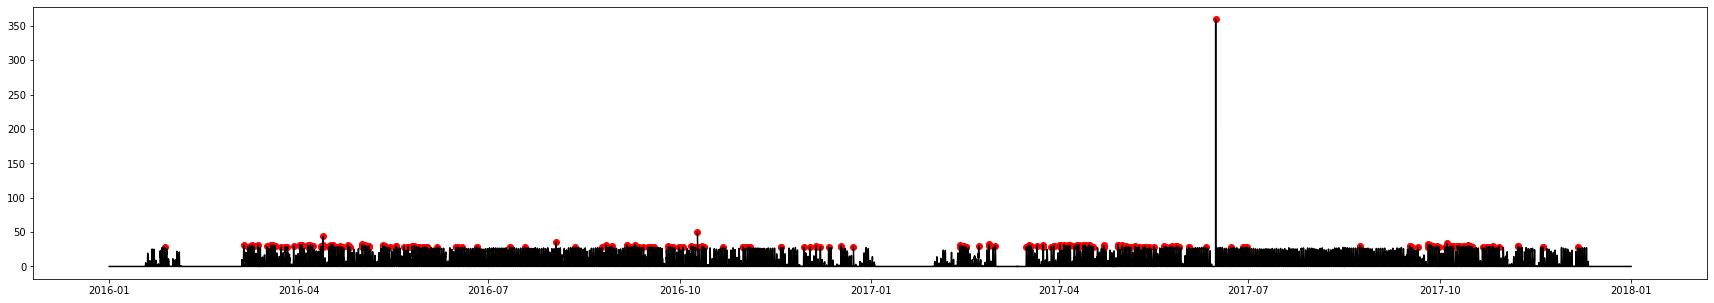

In [138]:
plt.figure(figsize=(30,5))
plt.scatter(df_anom["timestamp"], df_anom["Mari_Bobcat_Education"], c='red', marker='o', linestyle='None')
plt.plot(df["timestamp"], df["Mari_Bobcat_Education"], c= "black")
plt.show()

In [139]:
# Outliers
df_anom = df_anom.set_index("timestamp")
outliers = df_anom.copy()

In [140]:
# replace not null values with 2 (outliers)
outliers[outliers.isna() == False] = 2

In [141]:
# Set index and copy to replace values
df_qm = df.set_index("timestamp").copy()

In [142]:
# "Good data"
df_qm[df_qm > 0] = 3
# Zero values
df_qm[df_qm <= 0] = 1
# Update df with outliers data
df_qm.update(outliers)
# Fill na with 0
df_qm.fillna(value=0, inplace=True)

In [143]:
# Sort by quantity of "good data"
df_qm = df_qm.T.loc[df_qm.T.sum(axis=1).sort_values().index]

## Plot

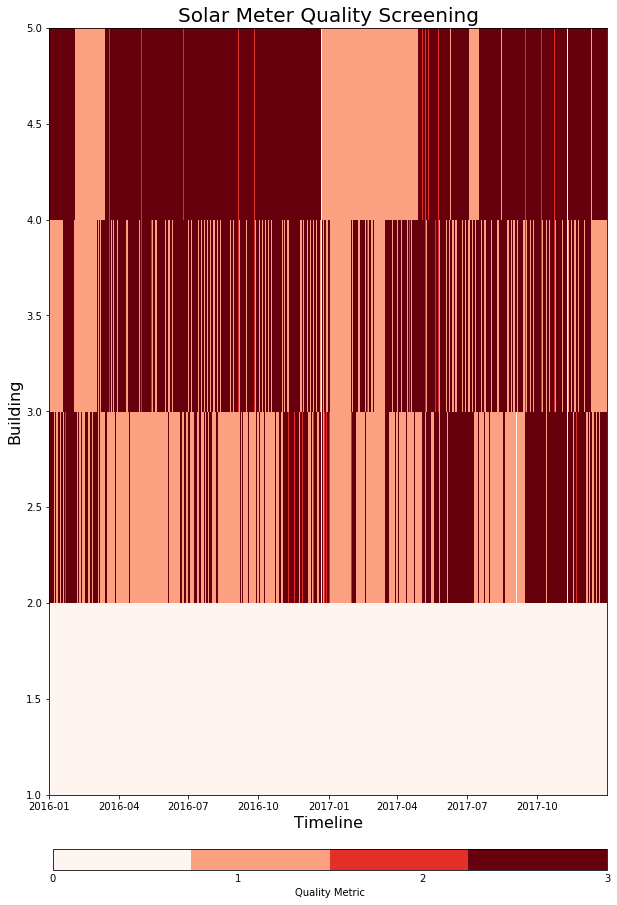

In [144]:
fig = plotHeatmap(df_qm, "Solar")

In [145]:
pd.DataFrame(df_qm.index, index = np.linspace(1, len(df_qm), len(df_qm)), columns = ["building_id"])

,building_id
1.0,Yvette_Bobcat_Office
2.0,Tabitha_Bobcat_Education
3.0,Mari_Bobcat_Education
4.0,Kenny_Bobcat_Education
5.0,Amelia_Bobcat_Other


In [146]:
fig.savefig("..\\figures\\dataQuality_solar.jpg", dpi=300, bbox_inches='tight')

# Steam meter

In [147]:
# load data
df = pd.read_csv(path + "steam.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 371 entries, timestamp to Peter_Cockatoo_Publicservices
dtypes: float64(370), object(1)
memory usage: 49.7+ MB


In [148]:
# Transform timestamp to datetime object type
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')

## Detect NaNs and atypical data

In [149]:
# load anomalies df
df_anom = pd.read_csv("anomalies\\steam_anoms.csv")
# Transform timestamp to datetime object type
df_anom["timestamp"] = pd.to_datetime(df_anom["timestamp"], format='%Y-%m-%d %H:%M:%S')
# Remove timezone offset at the end of timestamp
df_anom["timestamp"] = df_anom.timestamp.apply(lambda d: d.replace(tzinfo=None))

In [150]:
df_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 261 entries, timestamp to Peter_Cockatoo_Publicservices
dtypes: datetime64[ns](1), float64(260)
memory usage: 34.9 MB


In [151]:
df_anom.columns

Index(['timestamp', 'Ivette_Eagle_Lodging/residential',
       'Burt_Eagle_Lodging/residential', 'Clinton_Eagle_Education',
       'Rene_Eagle_Office', 'Sofia_Eagle_Office', 'Clark_Eagle_Office',
       'Jolene_Eagle_Education', 'Lucy_Eagle_Lodging/residential',
       'Man_Eagle_Education',
       ...
       'Natalie_Cockatoo_Office', 'Norbert_Cockatoo_Office',
       'Estela_Cockatoo_Lodging/residential',
       'Elmira_Cockatoo_Entertainment/publicassembly',
       'Casandra_Cockatoo_Office', 'Weldon_Cockatoo_Education',
       'Angie_Cockatoo_Education', 'Tara_Cockatoo_Education',
       'Corie_Cockatoo_Education', 'Peter_Cockatoo_Publicservices'],
      dtype='object', length=261)

To plot a building with outliers marked:

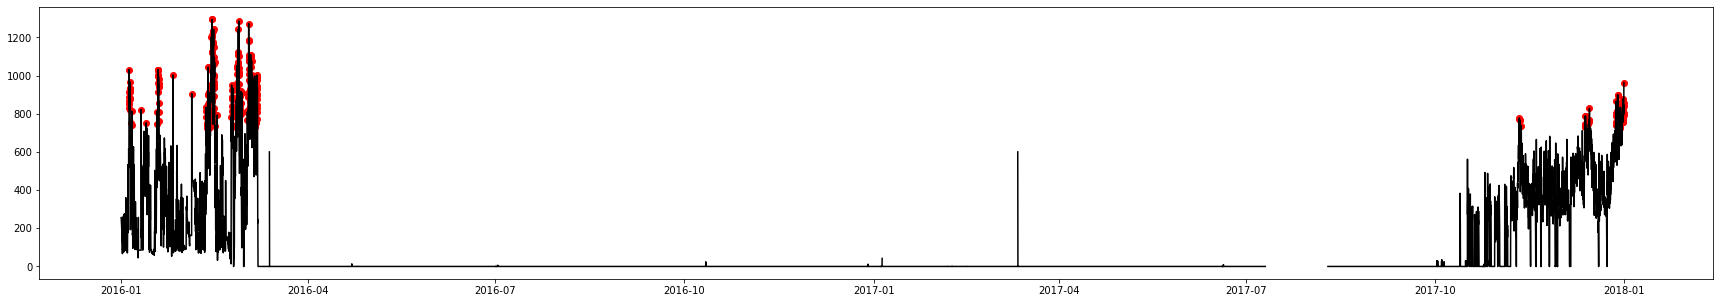

In [152]:
plt.figure(figsize=(30,5))
plt.scatter(df_anom["timestamp"], df_anom["Ivette_Eagle_Lodging/residential"], c='red', marker='o', linestyle='None')
plt.plot(df["timestamp"], df["Ivette_Eagle_Lodging/residential"], c= "black")
plt.show()

In [153]:
# Outliers
df_anom = df_anom.set_index("timestamp")
outliers = df_anom.copy()

In [154]:
# replace not null values with 2 (outliers)
outliers[outliers.isna() == False] = 2

In [155]:
# Set index and copy to replace values
df_qm = df.set_index("timestamp").copy()

In [156]:
# "Good data"
df_qm[df_qm > 0] = 3
# Zero values
df_qm[df_qm <= 0] = 1
# Update df with outliers data
df_qm.update(outliers)
# Fill na with 0
df_qm.fillna(value=0, inplace=True)

In [157]:
# Sort by quantity of "good data"
df_qm = df_qm.T.loc[df_qm.T.sum(axis=1).sort_values().index]

## Plot

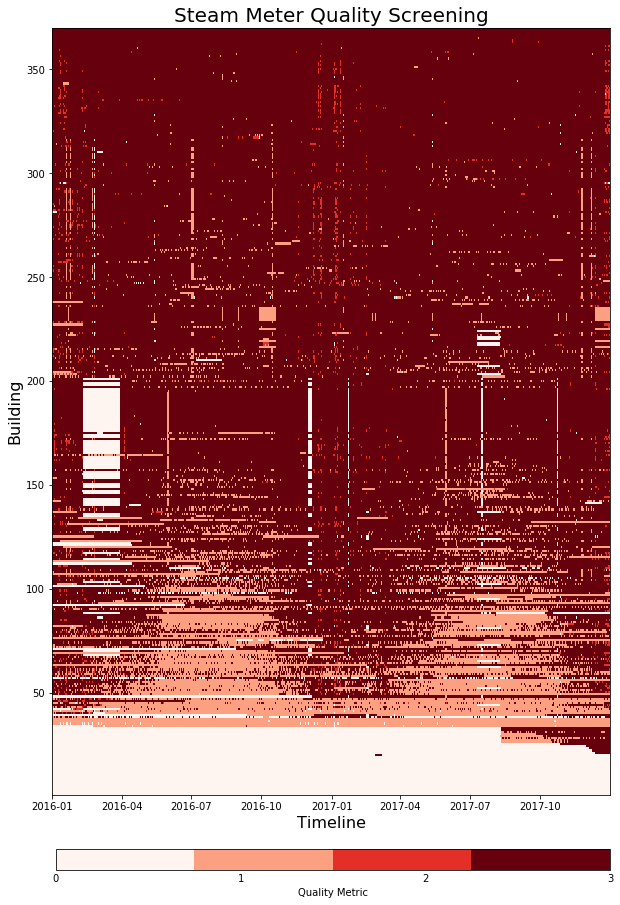

In [158]:
fig = plotHeatmap(df_qm, "Steam")

In [159]:
pd.DataFrame(df_qm.index, index = np.linspace(1, len(df_qm), len(df_qm)), columns = ["building_id"])

,building_id
1.0,Louise_Cockatoo_Lodging/residential
2.0,Rachelle_Cockatoo_Manufacturing/industrial
3.0,Hui_Cockatoo_Lodging/residential
4.0,Ricardo_Eagle_Office
5.0,Bridgett_Cockatoo_Lodging/residential
...,...
366.0,Amy_Hog_Office
367.0,Julieann_Hog_Lodging/residential
368.0,Alanna_Hog_Office
369.0,Angla_Hog_Office


In [160]:
fig.savefig("..\\figures\\dataQuality_steam.jpg", dpi=300, bbox_inches='tight')

# Water meter

In [161]:
# load data
df = pd.read_csv(path + "water.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 147 entries, timestamp to Mary_Wolve_Education
dtypes: float64(146), object(1)
memory usage: 19.7+ MB


In [162]:
# Transform timestamp to datetime object type
df["timestamp"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S')

## Detect NaNs and atypical data

In [163]:
# load anomalies df
df_anom = pd.read_csv("anomalies\\water_anoms.csv")
# Transform timestamp to datetime object type
df_anom["timestamp"] = pd.to_datetime(df_anom["timestamp"], format='%Y-%m-%d %H:%M:%S')
# Remove timezone offset at the end of timestamp
df_anom["timestamp"] = df_anom.timestamp.apply(lambda d: d.replace(tzinfo=None))

In [164]:
df_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 117 entries, timestamp to Mary_Wolve_Education
dtypes: datetime64[ns](1), float64(116)
memory usage: 15.7 MB


In [165]:
df_anom.columns

Index(['timestamp', 'Jarrod_Panther_Lodging/residential',
       'Enriqueta_Panther_Office', 'Ivan_Panther_Lodging/residential',
       'Stefanie_Panther_Education', 'Jody_Panther_Education',
       'Rachel_Panther_Retail', 'Kristen_Panther_Lodging/residential',
       'Dorathy_Panther_Office', 'Paulette_Panther_Other',
       ...
       'Viva_Wolve_Education', 'Matt_Wolve_Education',
       'Crystal_Wolve_Education', 'Martha_Wolve_Education',
       'Lenora_Wolve_Retail', 'Elfriede_Wolve_Retail',
       'Catharine_Wolve_Office', 'Jeana_Wolve_Education',
       'Gordon_Wolve_Entertainment/publicassembly', 'Mary_Wolve_Education'],
      dtype='object', length=117)

To plot a building with outliers marked:

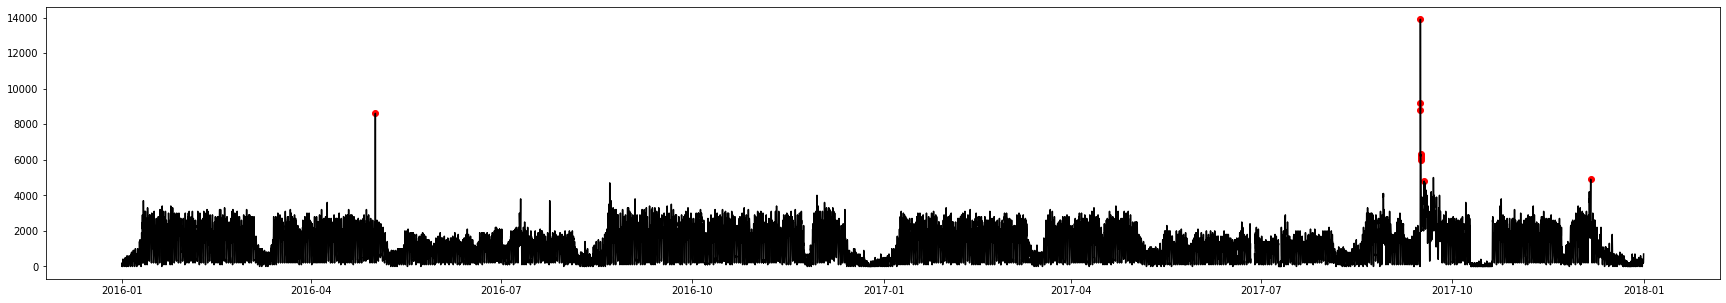

In [166]:
plt.figure(figsize=(30,5))
plt.scatter(df_anom["timestamp"], df_anom["Jarrod_Panther_Lodging/residential"], c='red', marker='o', linestyle='None')
plt.plot(df["timestamp"], df["Jarrod_Panther_Lodging/residential"], c= "black")
plt.show()

In [167]:
# Outliers
df_anom = df_anom.set_index("timestamp")
outliers = df_anom.copy()

In [168]:
# replace not null values with 2 (outliers)
outliers[outliers.isna() == False] = 2

In [169]:
# Set index and copy to replace values
df_qm = df.set_index("timestamp").copy()

In [170]:
# "Good data"
df_qm[df_qm > 0] = 3
# Zero values
df_qm[df_qm <= 0] = 1
# Update df with outliers data
df_qm.update(outliers)
# Fill na with 0
df_qm.fillna(value=0, inplace=True)

In [171]:
# Sort by quantity of "good data"
df_qm = df_qm.T.loc[df_qm.T.sum(axis=1).sort_values().index]

## Plot

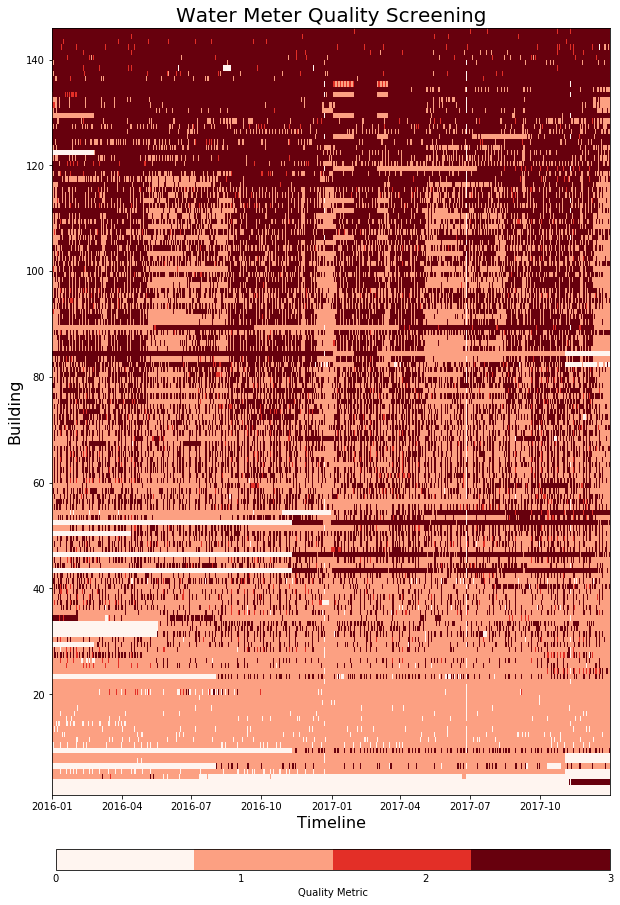

In [172]:
fig = plotHeatmap(df_qm, "Water")

In [173]:
pd.DataFrame(df_qm.index, index = np.linspace(1, len(df_qm), len(df_qm)), columns = ["building_id"])

,building_id
1.0,Sarita_Bobcat_Office
2.0,Tabitha_Bobcat_Education
3.0,Fernanda_Bobcat_Education
4.0,Brenna_Panther_Office
5.0,Francesco_Bobcat_Education
...,...
142.0,Guadalupe_Wolve_Office
143.0,Catharine_Wolve_Office
144.0,Viva_Wolve_Education
145.0,Mary_Wolve_Education


In [174]:
fig.savefig("..\\figures\\dataQuality_water.jpg", dpi=300, bbox_inches='tight')